# Face ID project

### Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def showImg(img, title = ''):
    plt.figure(figsize = (10,10));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

def showGrayScaleImg(img, title = ''):
    plt.figure(figsize = (10,10));
    plt.title(title)
    plt.imshow(img, cmap='gray')

all_contours = -1
green = (0,255,0)
thickness = 2

new_img = cv2.UMat(cv2.IMREAD_COLOR)

## Cargamos Edgar

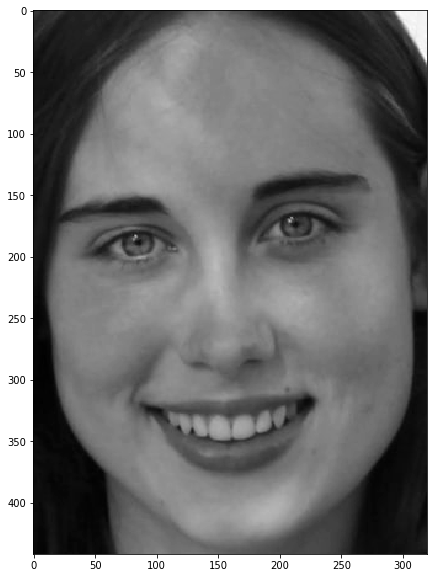

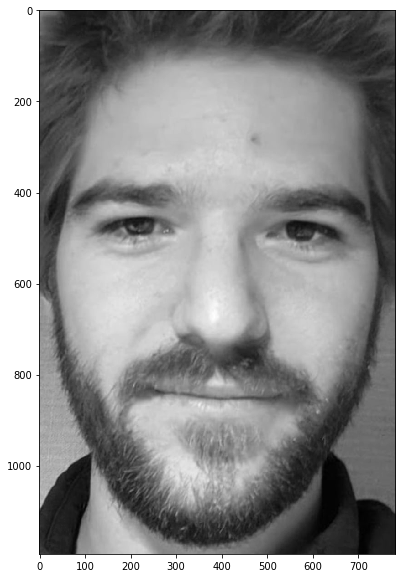

In [3]:
image_template = []

image_template.append(cv2.imread('img/eva.jpg', 0)) 
image_template.append(cv2.imread('img/edgar.jpg', 0))
for i in range(len(image_template)):
    showGrayScaleImg(image_template[i])

In [4]:
def ORB_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of ORB matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    
    #showImg(image1)
    
    # Create ORB detector with 1000 keypoints with a scaling pyramid factor of 1.2
    orb = cv2.ORB_create(1000, 1.2)
    
    # Detect keypoints of original image
    (kp1, des1) = orb.detectAndCompute(image1, None)

    # Detect keypoints of rotated image
    (kp2, des2) = orb.detectAndCompute(image_template, None)

    # Create matcher     
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Do matching
    matches = bf.match(des1,des2)

    # Sort the matches based on distance.  Least distance
    # is better
    matches = sorted(matches, key=lambda val: val.distance)
    
    if len(matches) > 210:
        matches_img = cv2.drawMatches(image1,kp1,image_template,kp2,matches[:20],None)
        cv2.imwrite('orbMatches.jpg',matches_img)

    return matches

In [ ]:
cap = cv2.VideoCapture(0)

while True:

    # Get webcam images
    ret, frame = cap.read()
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
    top_left_x = width // 3
    top_left_y = (height // 2) + (height // 4)
    bottom_right_x = (width // 3) * 2
    bottom_right_y = (height // 2) - (height // 4)
    
    # Draw rectangular window for our region of interest
    cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
    #cv2.rectangle(img_copy,(240,220),(550,510),(0,255,0),2);
    
    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]
   
    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)
    
    # Get number of ORB matches 
    for i in range(len(image_template)):
        
        
        matches = ORB_detector(cropped, image_template[i])
    
        # Display status string showing the current no. of matches 
        #output_string = "Matches = " + str(len(matches))
        #cv2.putText(frame, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)

        # Our threshold to indicate object deteciton
        # For new images or lightening conditions you may need to experiment a bit     
        threshold = 150

        # If matches exceed our threshold then object has been detected
        if len(matches) > threshold:
            #frame = frame.copy()
            if i == 0:
                text = "Eva"
                cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
                cv2.putText(frame,text,(150,150), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2) 
                break
            elif i == 1:
                text = "Edgar"
                cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
                cv2.putText(frame,text,(150,150), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2) 
                break
            
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


### Haar Cascades

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def showImg(img, title = ''):
    plt.figure(figsize = (10,10));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

def showGrayScaleImg(img, title = ''):
    plt.figure(figsize = (10,10));
    plt.title(title)
    plt.imshow(img, cmap='gray')

all_contours = -1
green = (0,255,0)
thickness = 2

new_img = cv2.UMat(cv2.IMREAD_COLOR)


#####################################3

image_template = []

image_template.append(cv2.imread('img/eva.jpg')) 
image_template.append(cv2.imread('img/edgar.jpg'))
#for i in range(len(image_template)):
 #   showImg(image_template[i])
    
####################################3

def ORB_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of ORB matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    
    #showImg(image1)
    
    # Create ORB detector with 1000 keypoints with a scaling pyramid factor of 1.2
    orb = cv2.ORB_create(1000, 1.2)
    
    # Detect keypoints of original image
    (kp1, des1) = orb.detectAndCompute(image1, None)

    # Detect keypoints of rotated image
    (kp2, des2) = orb.detectAndCompute(image_template, None)

    # Create matcher     
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Do matching
    matches = bf.match(des1,des2)

    # Sort the matches based on distance.  Least distance
    # is better
    matches = sorted(matches, key=lambda val: val.distance)
    
    if len(matches) > 210:
        matches_img = cv2.drawMatches(image1,kp1,image_template,kp2,matches[:20],None)
        cv2.imwrite('orbMatches.jpg',matches_img)

    return matches

#################################################






In [ ]:
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

while True:

    # Get webcam images
    ret, frame = cap.read()
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions (Note some of these things should be outside the loop)
    top_left_x = width // 3
    top_left_y = (height // 2) + (height // 4)
    bottom_right_x = (width // 3) * 2
    bottom_right_y = (height // 2) - (height // 4)

    faces = face_classifier.detectMultiScale(frame, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h), (127,0,255), 2)
    
    # Draw rectangular window for our region of interest
    #cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
    #cv2.rectangle(img_copy,(240,220),(550,510),(0,255,0),2);
    
    # Crop window of observation we defined above
    #cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]
        magin = 30
        top_left_x = x-magin
        top_left_y = y-magin
        bottom_right_x = x+w+magin
        bottom_right_y = y+h+magin
    

    cropped = frame[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    #showImg(cropped)
    
    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)
    
    # Get number of ORB matches 
    for i in range(len(image_template)):
        
        
        matches = ORB_detector(cropped, image_template[i])
    
        # Display status string showing the current no. of matches 
        #output_string = "Matches = " + str(len(matches))
        #cv2.putText(frame, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)

        # Our threshold to indicate object deteciton
        # For new images or lightening conditions you may need to experiment a bit     
        threshold = 150

        # If matches exceed our threshold then object has been detected
        if len(matches) > threshold:
            #frame = frame.copy()
            if i == 0:
                text = "Eva"
                #cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
                cv2.putText(frame,text,(int(width-top_left_x-w),top_left_y), cv2.FONT_HERSHEY_COMPLEX, 2 ,(127,0,255), 2) 
                break
            elif i == 1:
                text = "Edgar"
                #cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
                cv2.putText(frame,text,(int(width-top_left_x-w),top_left_y), cv2.FONT_HERSHEY_COMPLEX, 2 ,(127,0,255), 2) 
                break
            
    cv2.imshow('Object Detector using ORB', frame)
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)